# The Spark Foundation - GRIP - Data Science & Business Analytics
## Task  : Exploratory Data Analysis - Sports (Indian Premier League) [2008-2019] 
### Presented By : Aditya Barakoti
### Dataset Used : https://bit.ly/34SRn3b

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
matches = pd.read_csv(r'C:\Users\HP\Desktop\Sports\matches.csv')

matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
deliveries = pd.read_csv(r'C:\Users\HP\Desktop\Sports\deliveries.csv')

deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [15]:
print(matches.info())
print(deliveries.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [16]:
season_data = matches[['id','season','winner']]
complete_data = deliveries.merge(season_data, how ='inner',left_on = 'match_id',right_on = 'id')

In [17]:
deliveries.columns.values

array(['match_id', 'inning', 'batting_team', 'bowling_team', 'over',
       'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs',
       'player_dismissed', 'dismissal_kind', 'fielder'], dtype=object)

In [18]:
# Dropping the NaN Column
matches = matches.drop(columns=["umpire3"],axis=1)
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [19]:
team_wins_per_season = matches.groupby(["season", "winner"]).size().unstack(fill_value=0)
team_wins_per_season

winner,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
season,,,,,,,,,,,,,,,
2008,9,2,0,7,0,10,0,6,7,0,13,0,0,4,0
2009,8,9,0,10,0,7,0,3,5,0,6,0,0,9,0
2010,9,8,0,7,0,4,0,7,11,0,6,0,0,8,0
2011,11,6,0,4,0,7,6,8,10,4,6,0,0,10,0
2012,10,4,0,11,0,8,0,12,10,4,7,0,0,8,0
2013,12,0,0,3,0,8,0,6,13,4,11,0,0,9,10
2014,10,0,0,2,0,12,0,11,7,0,7,0,0,5,6
2015,10,0,0,5,0,3,0,7,10,0,7,0,0,8,7
2016,0,0,0,7,9,4,0,8,7,0,0,0,5,9,11


In [20]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [21]:
wins_per_season = matches.groupby("season")["winner"].value_counts()
wins_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Mumbai Indians                  7
        Delhi Daredevils                7
        Kolkata Knight Riders           6
        Royal Challengers Bangalore     4
        Deccan Chargers                 2
2009    Delhi Daredevils               10
        Deccan Chargers                 9
        Royal Challengers Bangalore     9
        Chennai Super Kings             8
        Kings XI Punjab                 7
        Rajasthan Royals                6
        Mumbai Indians                  5
        Kolkata Knight Riders           3
2010    Mumbai Indians                 11
        Chennai Super Kings             9
        Deccan Chargers                 8
        Royal Challengers Bangalore     8
        Delhi Daredevils                7
        Kolkata Knight Riders           7
        Rajasthan Royals                

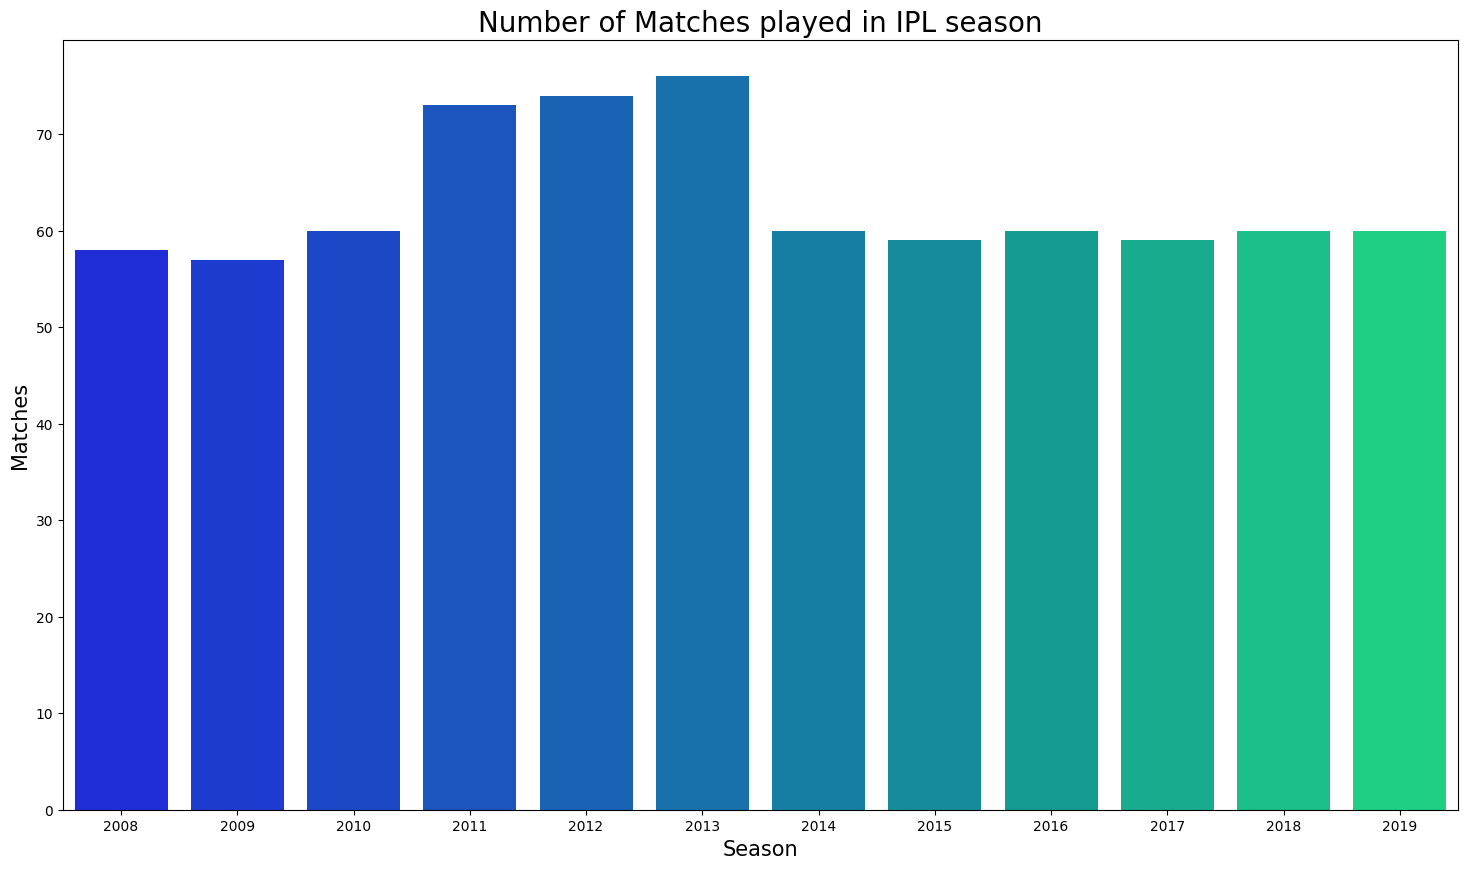

In [22]:
plt.figure(figsize=(18, 10))
sns.countplot(x='season', data=matches, palette="winter")
plt.title("Number of Matches played in IPL season", fontsize=20)
plt.xlabel("Season", fontsize=15)
plt.ylabel('Matches', fontsize=15)
plt.show()

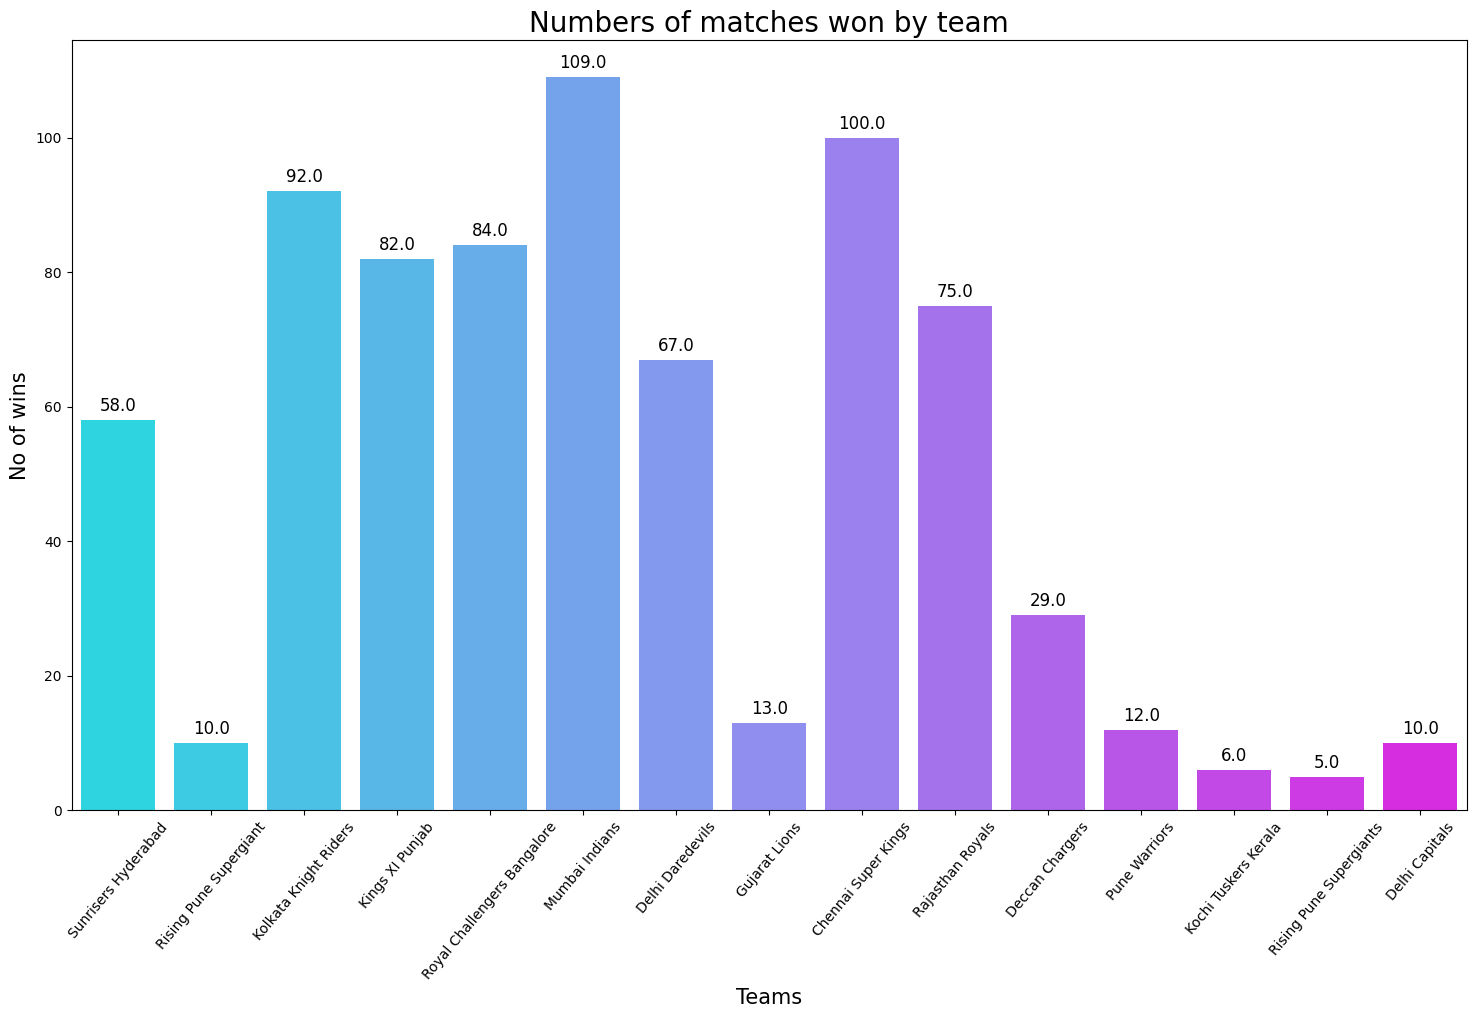

In [23]:
plt.figure(figsize=(18, 10))

# Create a countplot
ax = sns.countplot(x='winner', data=matches, palette='cool')

# Set title and labels
plt.title("Numbers of matches won by team", fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Teams", fontsize=15)
plt.ylabel("No of wins", fontsize=15)

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()

In [24]:
matches['win_by']=np.where(matches['win_by_runs']>0,'Bat first','Bowl first')

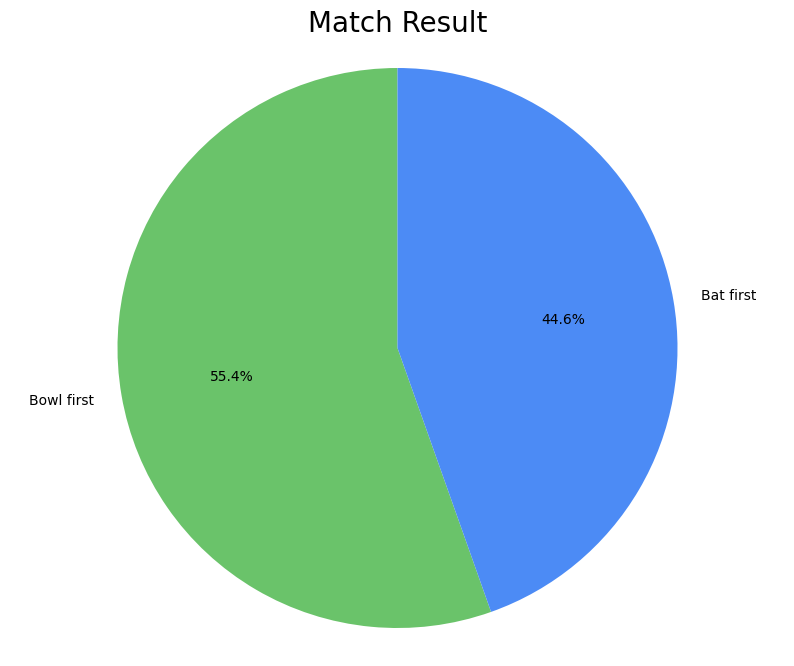

In [25]:
Win = matches['win_by'].value_counts()
labels = np.array(Win.index)
sizes = Win.values
colors = ['#6AC36A', '#4C8BF5']  # Change these colors as per your preference
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Match Result', fontsize=20)  # Adjust the font size here
plt.axis('equal')
plt.show()

<module 'matplotlib.pyplot' from 'C:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

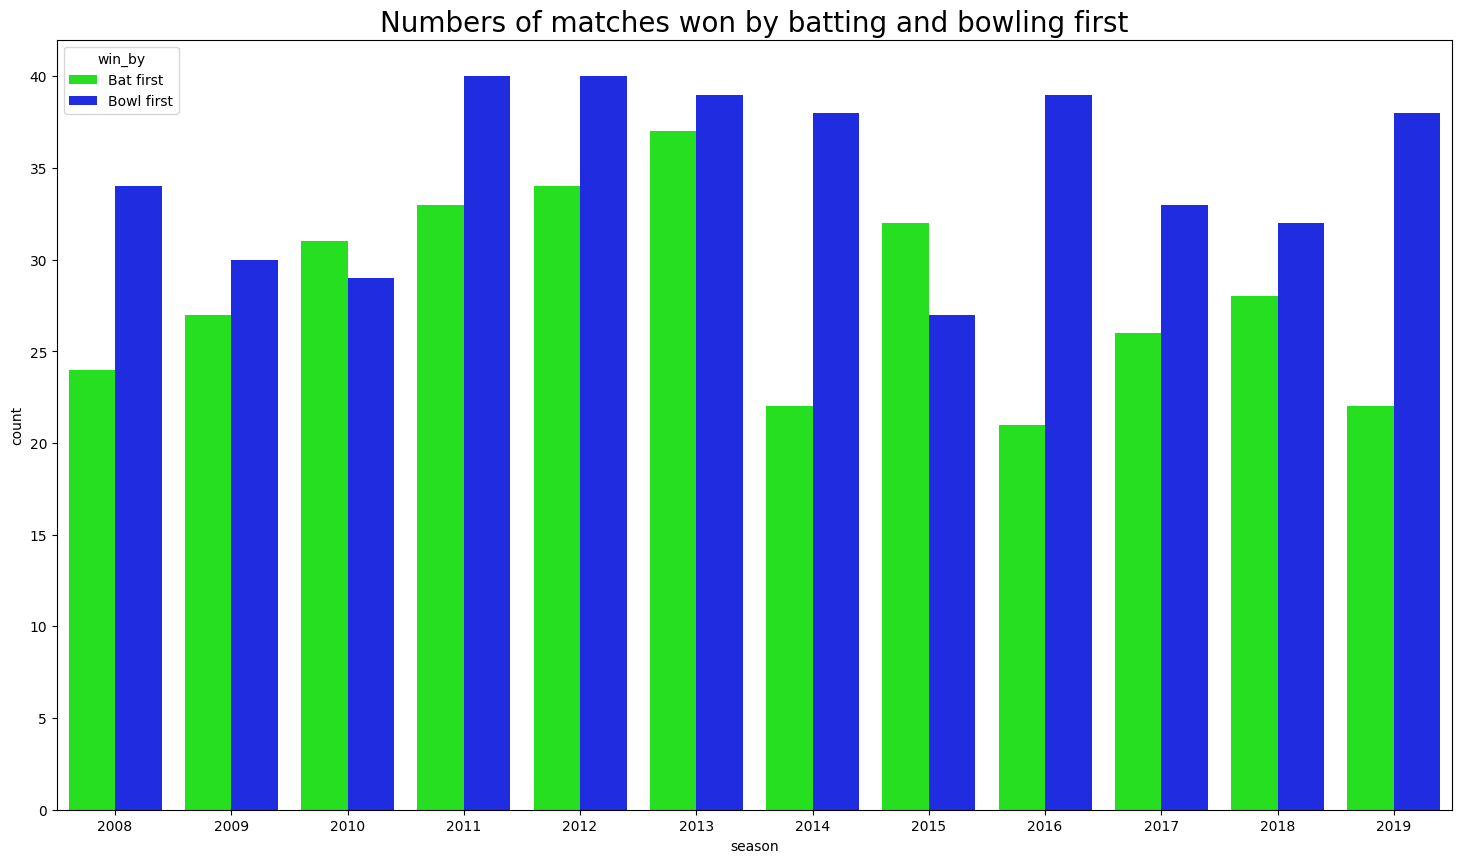

In [26]:
plt.figure(figsize=(18, 10))

# Use the data parameter and set x and hue attributes
sns.countplot(x='season', hue='win_by', data=matches, palette='hsv')

plt.title("Numbers of matches won by batting and bowling first", fontsize=20)
plt

# Alternate way

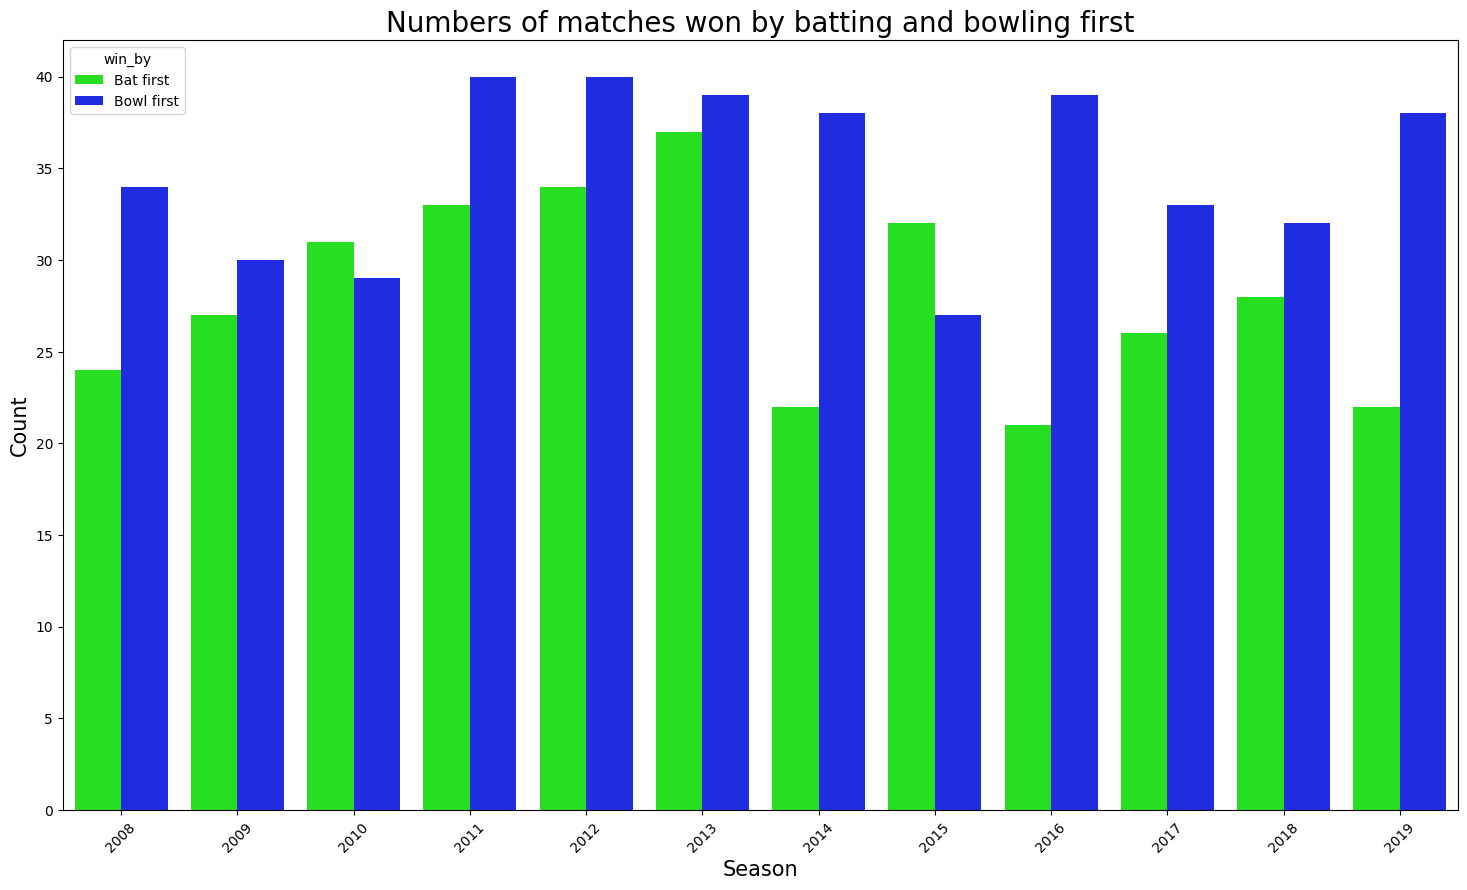

In [27]:
plt.figure(figsize=(18, 10))

sns.countplot(x='season', hue='win_by', data=matches, palette='hsv') 

plt.title("Numbers of matches won by batting and bowling first", fontsize=20)
plt.xlabel("Season", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(rotation=45) 
plt.show()

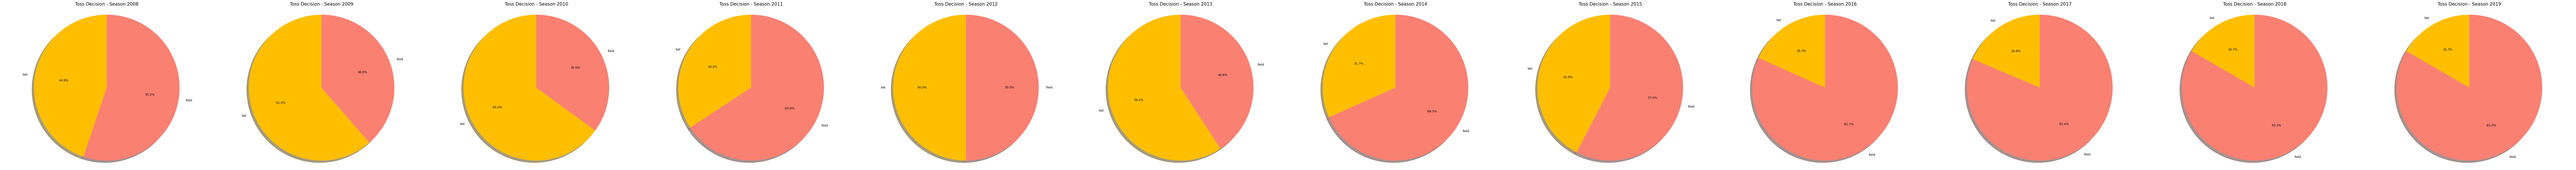

In [28]:
# Group the data by season and toss decision
toss_decision_count = matches.groupby(['season', 'toss_decision']).size().unstack()

# Plotting the pie charts for each season
num_seasons = len(toss_decision_count)
fig, axes = plt.subplots(nrows=1, ncols=num_seasons, figsize=(10*num_seasons, 8))

# Iterate over each season and create a pie chart
for i, season in enumerate(toss_decision_count.index):
    labels = toss_decision_count.columns
    sizes = toss_decision_count.loc[season].values
    colors = ['#FFBF00', '#FA8072']
    
    axes[i].pie(sizes, labels=labels, colors=colors,
                autopct='%1.1f%%', shadow=True, startangle=90)
    
    axes[i].set_title(f'Toss Decision - Season {season}', fontsize=15)
    axes[i].axis('equal')

plt.tight_layout()
plt.show()

# Toss decision:

Let us see the toss decisions taken so far.

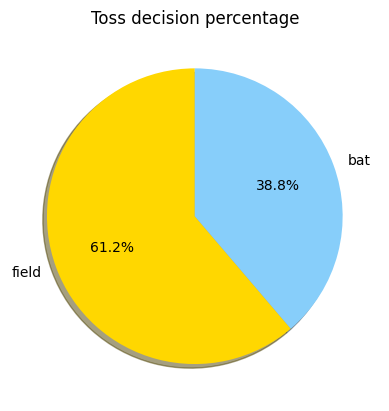

In [25]:
temp_series = matches.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

### Almost 61% of the toss decisions are made to field first. Now let us see how this decision varied over time.

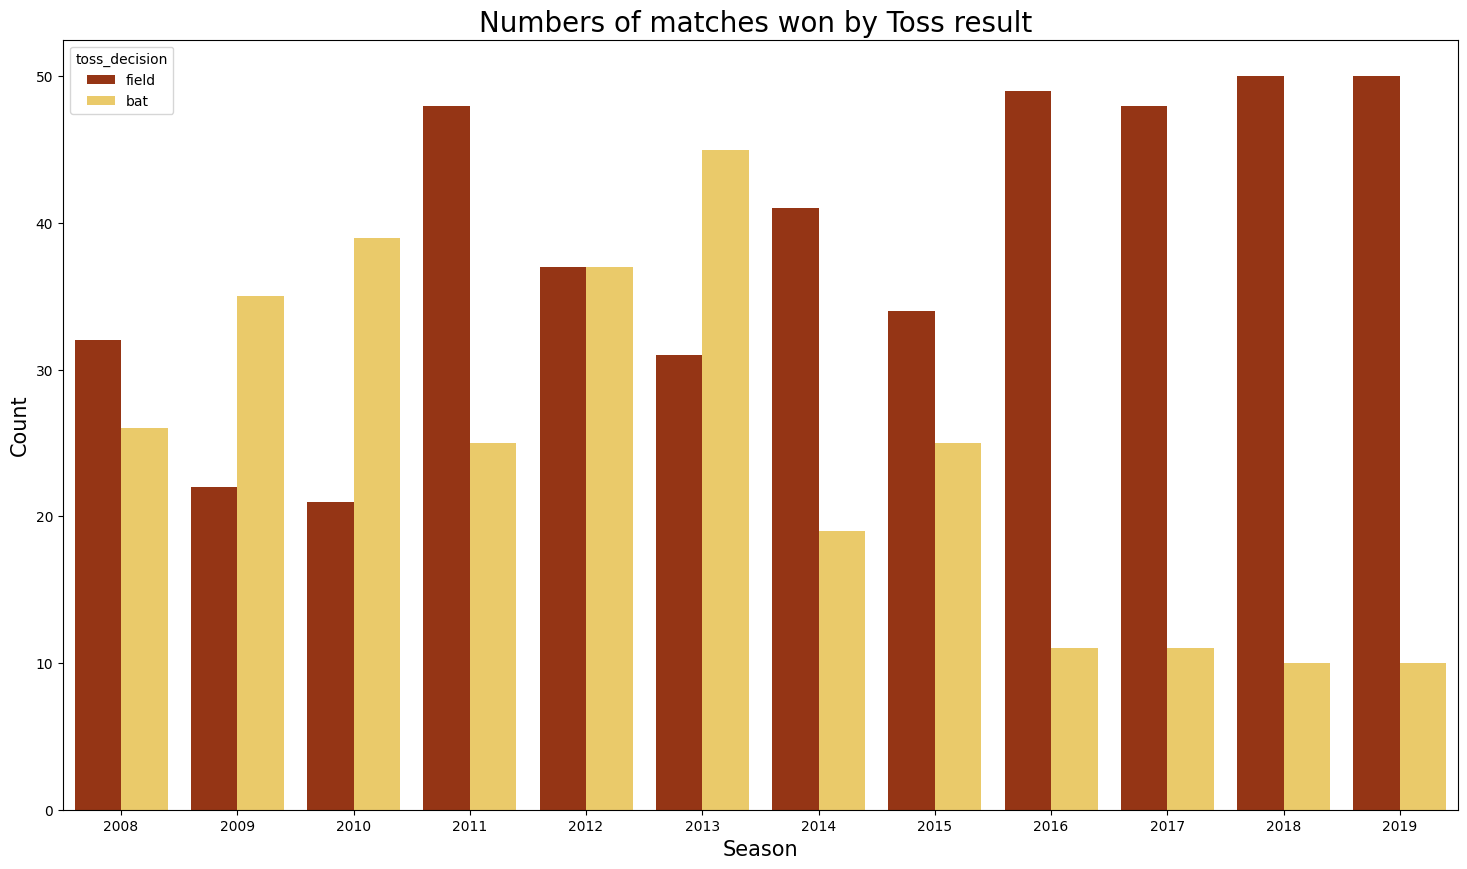

In [29]:
# we will plot graph on Numbers of matches won by Toss result
plt.figure(figsize = (18,10))
sns.countplot(x='season', hue='toss_decision', data=matches, palette='afmhot')  # Changed x to use correct column
plt.title("Numbers of matches won by Toss result ", fontsize=20)
plt.xlabel("Season", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show() 

### It seems during the initial years, teams wanted to bat first but when i look from the 2016 season, most of the toss decisions are to field first.

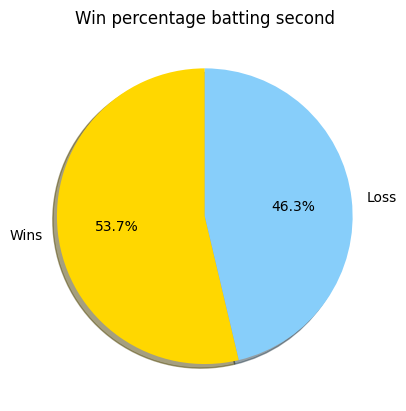

In [31]:
# Since there is a very strong trend towards batting second let us see the win percentage of teams batting second.
num_of_wins = (matches.win_by_wickets>0).sum()
num_of_loss = (matches.win_by_wickets==0).sum()
labels = ["Wins", "Loss"]
total = float(num_of_wins + num_of_loss)
sizes = [(num_of_wins/total)*100, (num_of_loss/total)*100]
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win percentage batting second")
plt.show()

In [27]:
# we will print winner season wise
final_matches=matches.drop_duplicates(subset=['season'], keep='last')

final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


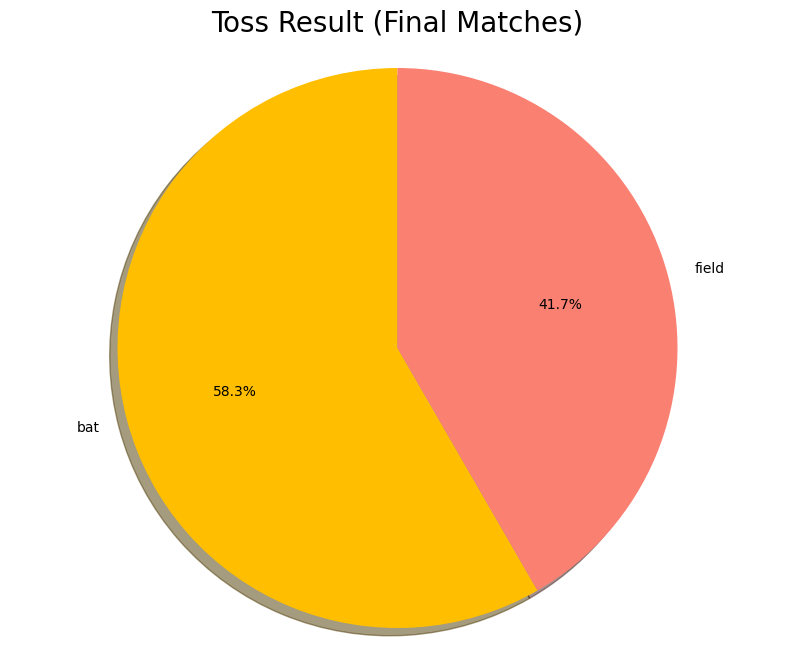

In [28]:
Toss = final_matches['toss_decision'].value_counts()
labels = np.array(Toss.index)
sizes = Toss.values
colors = ['#FFBF00', '#FA8072']

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('Toss Result (Final Matches)', fontsize=20)

# Adjust font size for axis labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.axis('equal')
plt.show()

<Figure size 1800x1000 with 0 Axes>

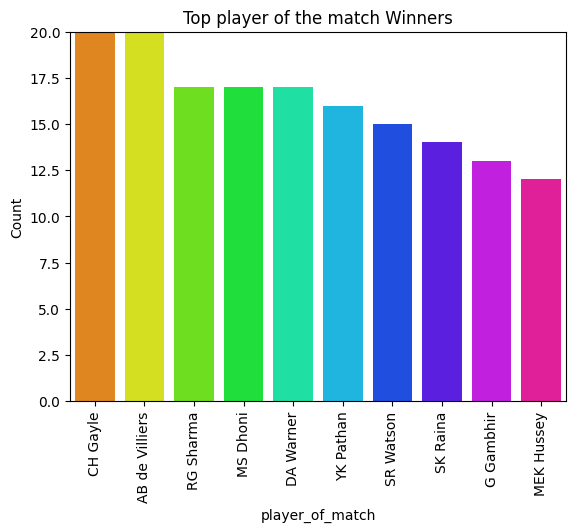

In [32]:
# we will print name of top player in IPL
plt.figure(figsize = (18,10))
top_players = matches.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="hsv");
plt.show()

<Figure size 1800x1000 with 0 Axes>

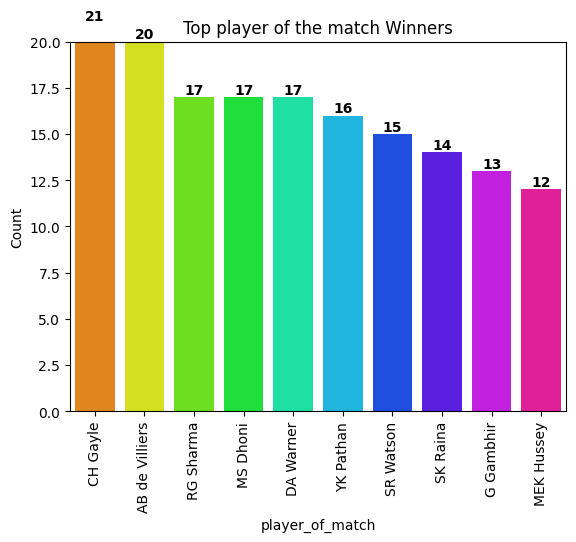

In [27]:
plt.figure(figsize=(18, 10))
top_players = matches.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0, 20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x=top_players.index, y=top_players, orient='v', palette="hsv")

for i, v in enumerate(top_players):
    ax.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

plt.show()

## In this code, we are iterating over the top_players series using the enumerate function. The enumerate function returns both the index (i) and the corresponding value (v) for each element in the top_players series.

For each iteration, we use the annotate function to add a text annotation to the plot. Here's what each parameter in the annotate function does:

str(v): Converts the value (v) to a string representation, which will be displayed as the text annotation.
xy=(i, v): Specifies the coordinates where the annotation will be placed. In this case, we use the index (i) as the x-coordinate and the value (v) as the y-coordinate.
ha='center': Sets the horizontal alignment of the text to the center of the annotation.
va='bottom': Sets the vertical alignment of the text to the bottom of the annotation.
By using ax.annotate, we can add text annotations on top of each bar in the bar plot, displaying the corresponding value associated with each bar.

In [33]:
# we will print number of season won by teams
final_matches["winner"].value_counts()

winner
Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: count, dtype: int64

In [34]:
# we will print toss winner, toss decision, winner in final matches.
final_matches[['team1','team2','toss_winner','toss_decision','winner','player_of_match']].reset_index(drop=True)

,team1,team2,toss_winner,toss_decision,winner,player_of_match
0,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,Mumbai Indians,KH Pandya
1,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,YK Pathan
2,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Deccan Chargers,A Kumble
3,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,Chennai Super Kings,SK Raina
4,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,Chennai Super Kings,M Vijay
5,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,Mumbai Indians,KA Pollard
7,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,BCJ Cutting


In [35]:
len(final_matches[final_matches['toss_winner']==final_matches['winner']]['winner'])

9

In [36]:
# we will print numbers of fours hit by team
four_data=deliveries[deliveries['batsman_runs']==4]
four_data.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])

,runs by fours,fours
batting_team,,
Chennai Super Kings,8772,2193
Deccan Chargers,3828,957
Delhi Capitals,968,242
Delhi Daredevils,8632,2158
Gujarat Lions,1840,460
Kings XI Punjab,9832,2458
Kochi Tuskers Kerala,680,170
Kolkata Knight Riders,9736,2434
Mumbai Indians,10352,2588


In [37]:
# we will print no of sixes hit by team
six_data=deliveries[deliveries['batsman_runs']==6]
six_data.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])

,runs by six,sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


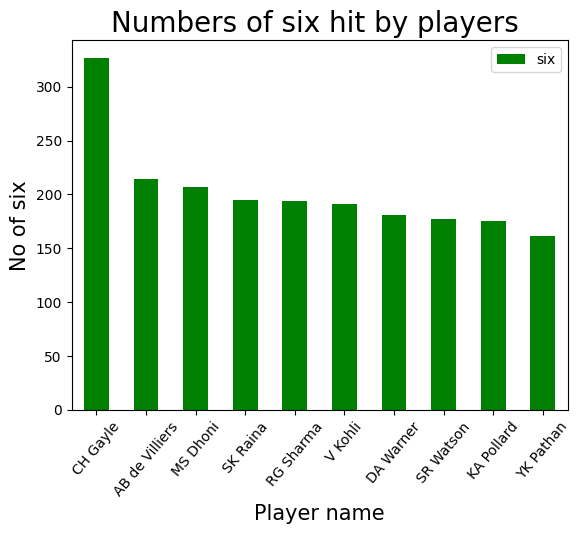

In [39]:
# we will plot graph of six hit by players
batsman_six=six_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=batsman_six.iloc[:10,:].plot('batsman','six',kind='bar',color='green')
plt.title("Numbers of six hit by players ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player name",fontsize=15)
plt.ylabel("No of six",fontsize=15)
plt.show()

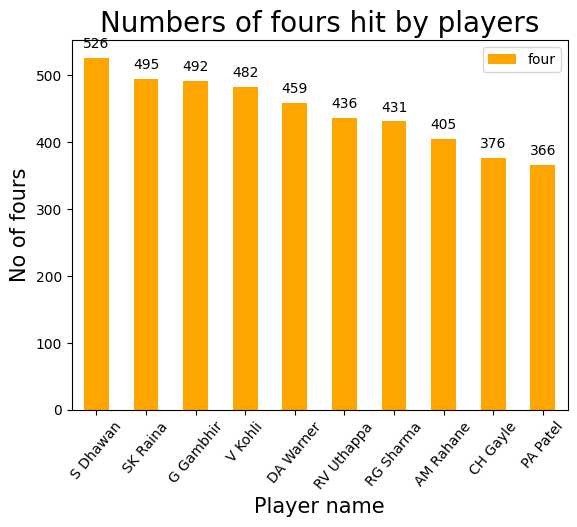

In [40]:
# Assuming the column name is 'batsman_runs'
batsman_four = four_data.groupby('batsman')['batsman_runs'].agg([('four', 'count')]).reset_index().sort_values('four', ascending=0)
ax = batsman_four.iloc[:10, :].plot('batsman', 'four', kind='bar', color='orange')

plt.title("Numbers of fours hit by players", fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player name", fontsize=15)
plt.ylabel("No of fours", fontsize=15)

# Add numbers on bars as labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()

In [41]:
# We will print the top 10 leading run scorer in IPL
batsman_score=deliveries.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
print("*** Top 10 Leading Run Scorer in IPL ***")
batsman_score.iloc[:10,:]

*** Top 10 Leading Run Scorer in IPL ***


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


In [42]:
# we will print no of matches played by batsman
No_Matches_player= deliveries[["match_id","player_dismissed"]]
No_Matches_player =No_Matches_player .groupby("player_dismissed")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
No_Matches_player.columns=["batsman","No_of Matches"]
No_Matches_player .head(5)

,batsman,No_of Matches
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137


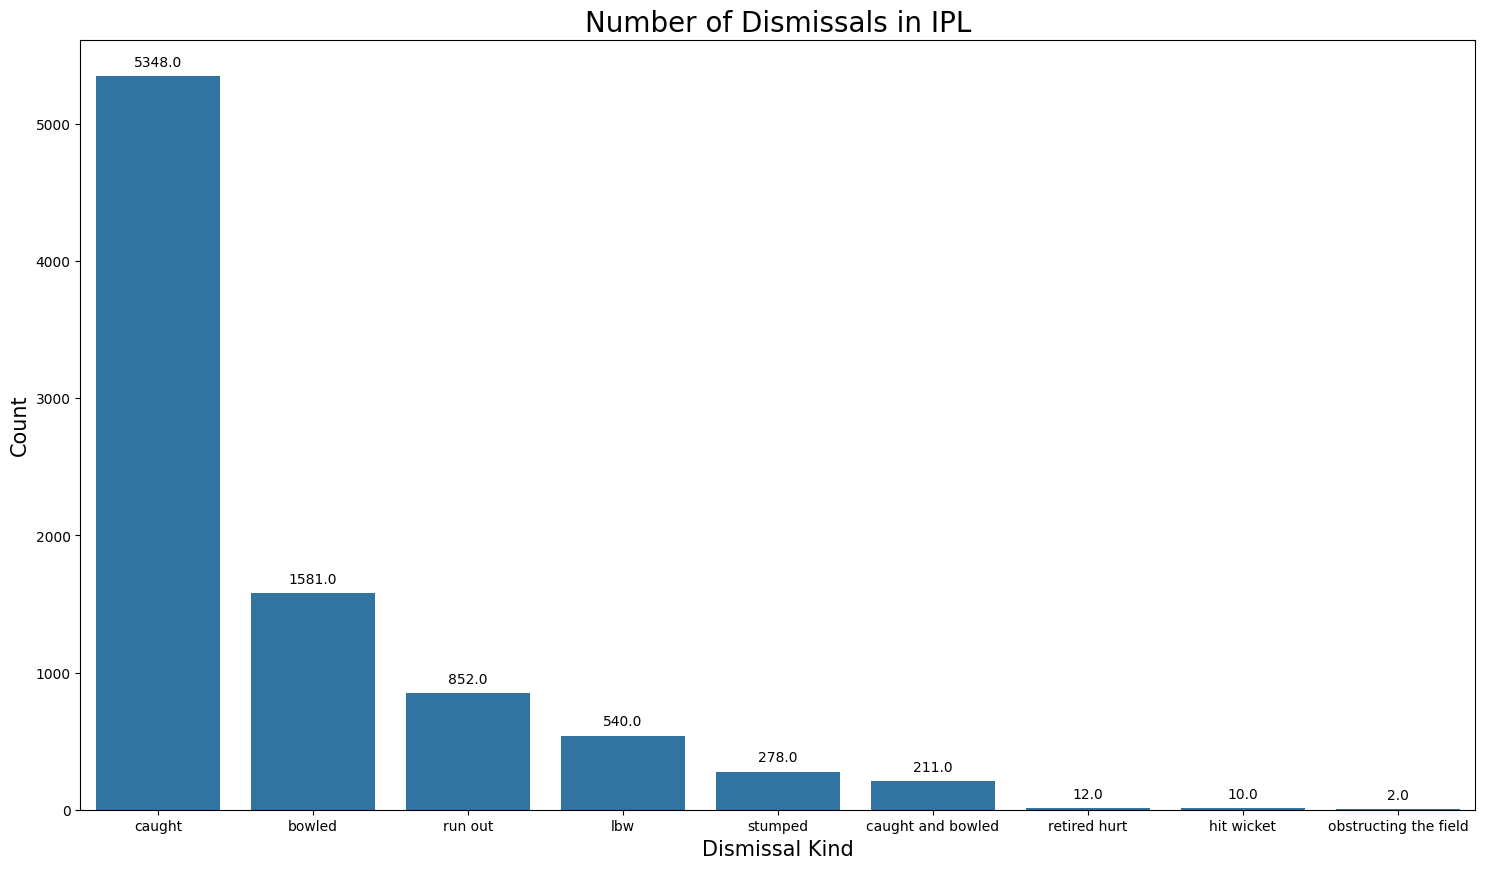

In [43]:
plt.figure(figsize=(18, 10))
ax = sns.countplot(x='dismissal_kind', data=deliveries, order=deliveries['dismissal_kind'].value_counts().index)

plt.title("Number of Dismissals in IPL", fontsize=20)
plt.xlabel("Dismissal Kind", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(rotation=0)

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()

In [45]:
wicket_data=deliveries.dropna(subset=['dismissal_kind'])
wicket_data=wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]

In [46]:
# we will print ipl most wicket taking bowlers
wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


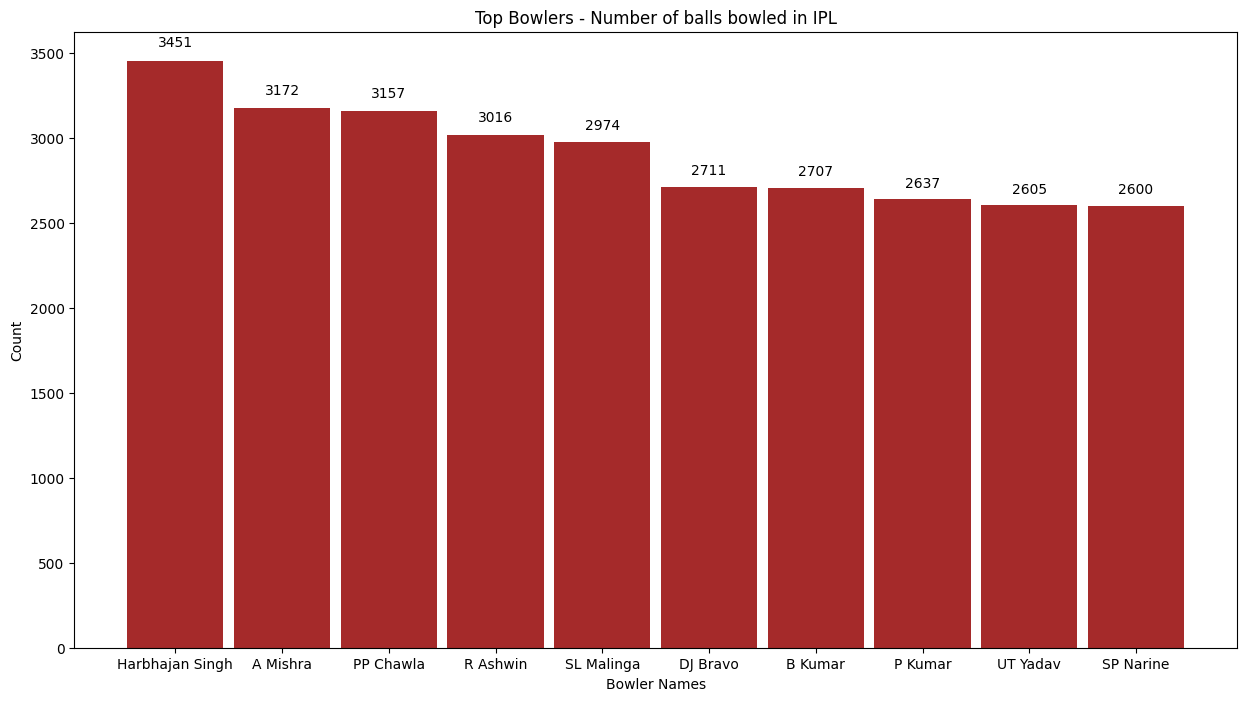

In [17]:
# Define autolabel function
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')
# Now let us see the bowlers who has bowled most number of dots in IPL.
temp_df = deliveries.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['ball']), width=width, color='brown')
ax.set_xticks(ind) # Adjusted to align labels at the middle of bars
ax.set_xticklabels(labels, rotation='horizontal')
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of balls bowled in IPL")
ax.set_xlabel('Bowler Names')
autolabel(rects)
plt.show()

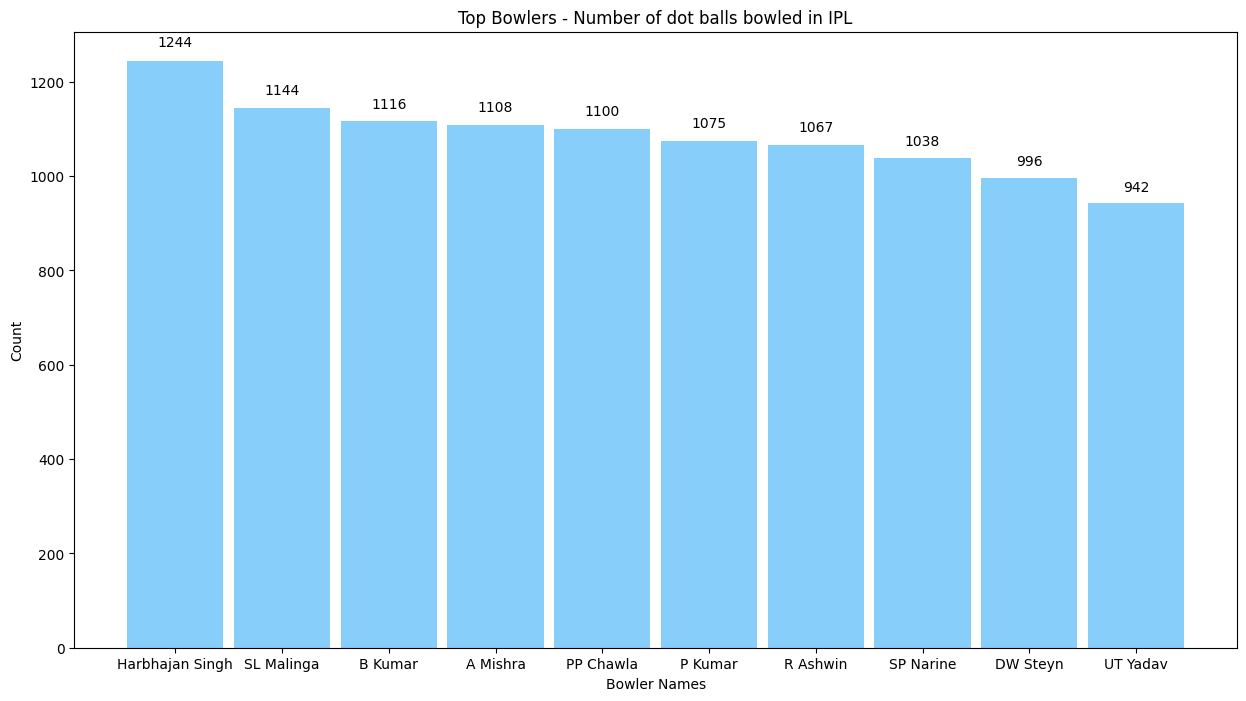

In [15]:
# Define autolabel function
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

# Now let us see the bowlers who has bowled most number of dots in IPL.
temp_df = deliveries.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['total_runs']), width=width, color='lightskyblue')
ax.set_xticks(ind) # Adjusted to align labels at the middle of bars
ax.set_xticklabels(labels, rotation='horizontal')
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of dot balls bowled in IPL")
ax.set_xlabel('Bowler Names')
autolabel(rects)
plt.show()

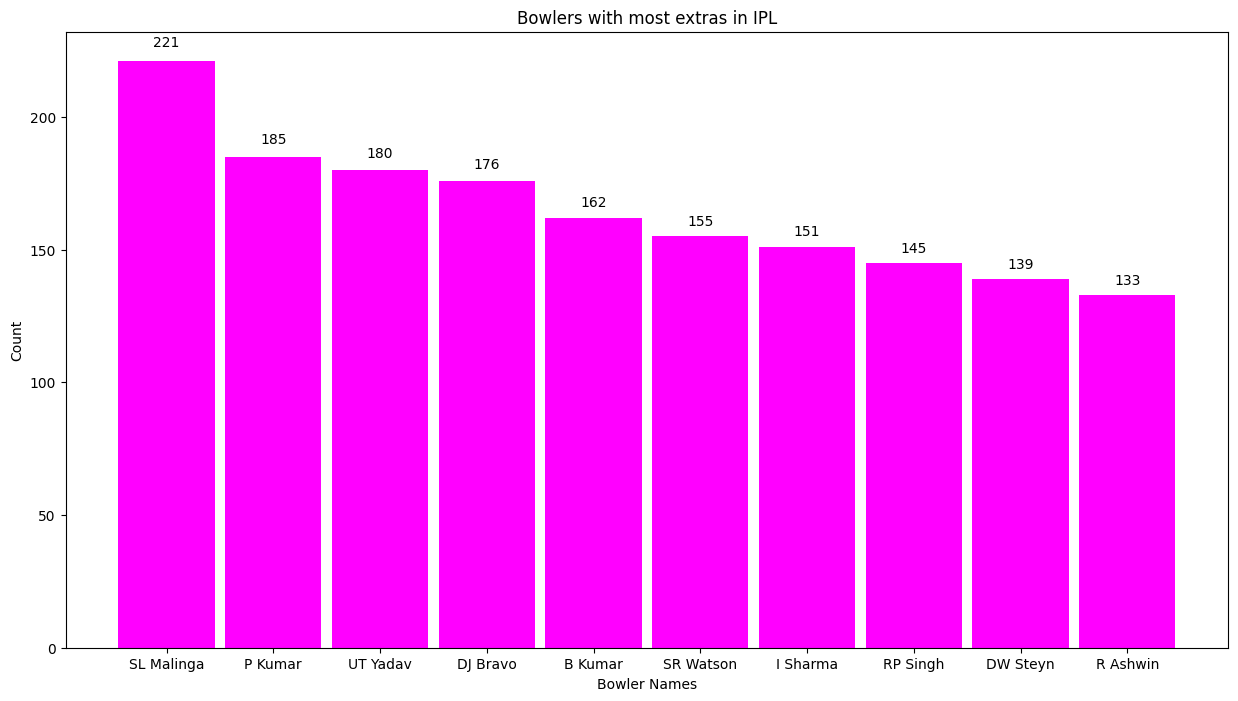

In [18]:
# Define autolabel function
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

# Your existing code
temp_df = deliveries.groupby('bowler')['extra_runs'].agg(lambda x: (x > 0).sum()).reset_index().sort_values(by='extra_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10, :]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15, 8))
rects = ax.bar(ind, np.array(temp_df['extra_runs']), width=width, color='magenta')
ax.set_xticks(ind)  # Adjusted to align labels at the middle of bars
ax.set_xticklabels(labels, rotation='horizontal', ha='center')  # Set ha='center' for horizontal alignment
ax.set_ylabel("Count")
ax.set_title("Bowlers with most extras in IPL")
ax.set_xlabel('Bowler Names')

# Call autolabel function
autolabel(rects)

plt.show()

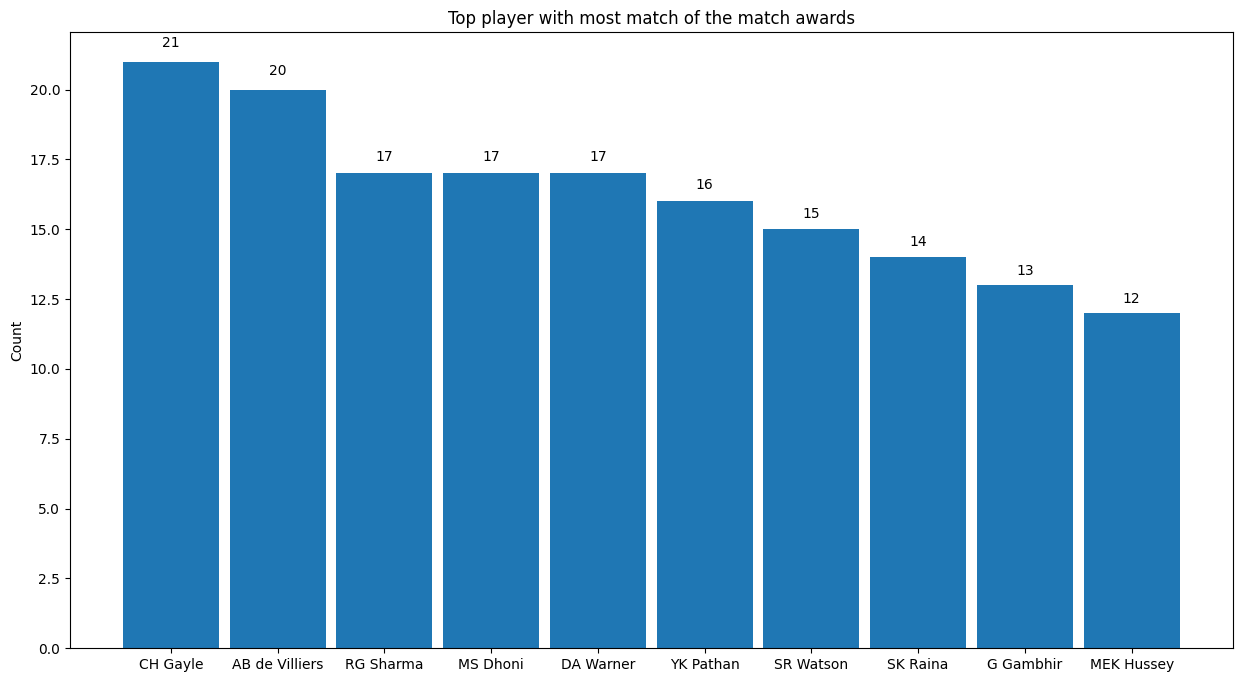

In [24]:
# create a function for labeling #
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

temp_series = matches.player_of_match.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_series), width=width)
ax.set_xticks(ind)
ax.set_xticklabels(labels, rotation='horizontal')
ax.set_ylabel("Count")
ax.set_title("Top player with most match of the match awards")
autolabel(rects)
plt.show()

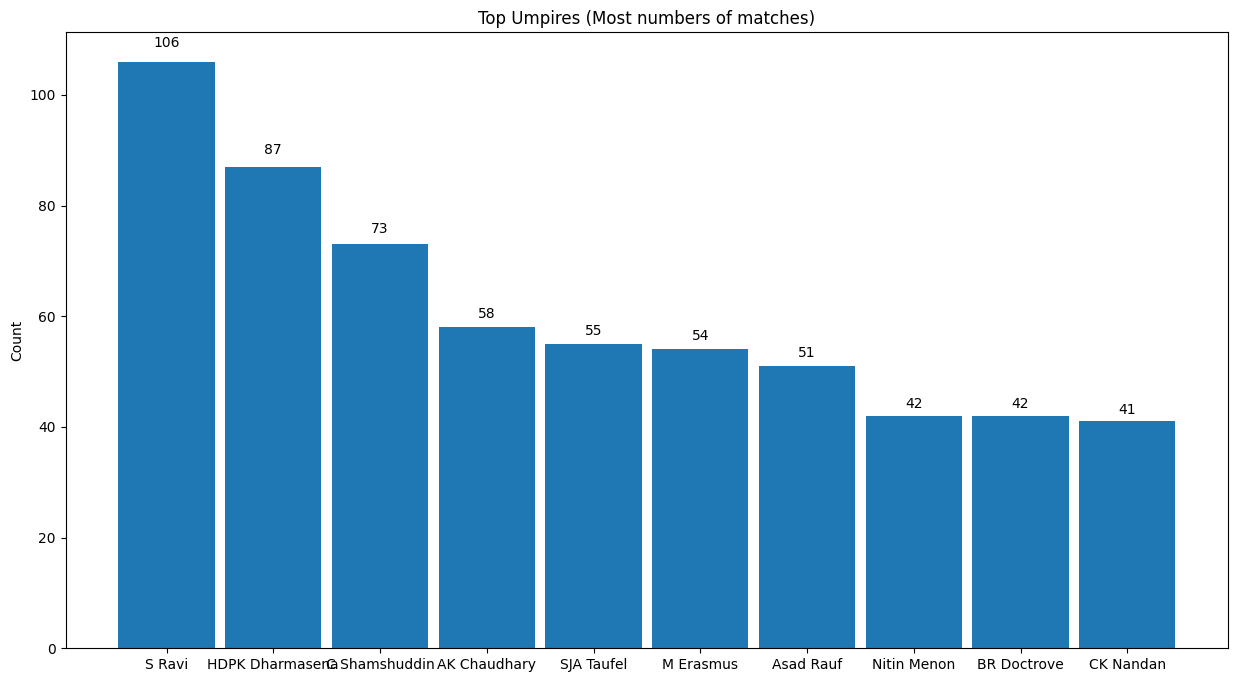

In [23]:
temp_df = pd.melt(matches, id_vars=['id'], value_vars=['umpire1', 'umpire2'])

temp_series = temp_df.value.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_series), width=width,)
ax.set_xticks(ind)
ax.set_xticklabels(labels, rotation='horizontal')
ax.set_ylabel("Count")
ax.set_title("Top Umpires (Most numbers of matches)")
autolabel(rects)
plt.show()

# INSIGHTS

1. During the IPL seasons of 2011, 2012, and 2013, the highest number of matches were played. 

2. Mumbai Indians emerged victorious in 4 out of 12 matches, marking the highest win rate.

3. It has been observed that teams bowling first tend to have a greater likelihood of winning compared to those batting first.

4. The preference for fielding first after winning the toss is more common among teams. In Contrast to this, in the finals, teams choosing to bat first after winning the toss have a higher success rate than those opting to field.

5. Notably, in the finals, the majority of teams prefer to bat first upon winning the toss.

6. The players CH Gayle and AB de Villiers are recognized as the top performers in match wins.

7. Interestingly, in 9 out of 12 IPL finals, the team that won the toss also clinched the championship.

8. Shikhar Dhawan holds the record for hitting the most fours, while CH Gayle leads in the number of sixes hit.

9. The top run-scorers in the IPL include Virat Kohli, SK Raina, and RG Sharma, with SK Raina and RG Sharma also being noted for playing the highest number of matches.

10. SL Malinga is distinguished as the bowler with the most wickets in the IPL.

# THANK YOU